Create the State of the class

In [1]:
from typing import TypedDict
class PortfolioState(TypedDict):
    amount_usd:float
    total_usd:float
    total_inr:float

Create the Nodes For calculating the intrest and convert it into InR

In [2]:
def calc(state:PortfolioState) -> PortfolioState:
    state['total_usd'] = state['amount_usd'] * 1.08
    return state

def convert_to_inr(state:PortfolioState) -> PortfolioState:
    state['total_inr'] = state['total_usd'] * 85
    return  state

<h3>Create the Edges</h3>
<ol>
<b><li>add_node() is a Function to create the nodes</li><b>
syntax: add_node('node_name',related_function)<br>

<b><li>add_edge() is a function that create the edges between the nodes</li></b>
syntax: add_edge(above_node,end_node)
</ol>

In [3]:
from langgraph.graph import StateGraph,START,END

builder = StateGraph(PortfolioState)

builder.add_node('calc_total',calc)
builder.add_node('convert_to_inr',convert_to_inr)

builder.add_edge(START,'calc_total')
builder.add_edge('calc_total','convert_to_inr')
builder.add_edge('convert_to_inr',END)

graph = builder.compile()

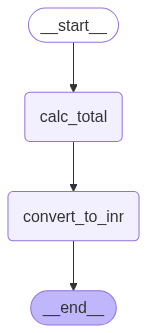

In [4]:
from IPython.display import Image,display

display(Image(graph.get_graph().draw_mermaid_png()))

In [5]:
graph.invoke({'amount_usd':150.2})

{'amount_usd': 150.2, 'total_usd': 162.216, 'total_inr': 13788.36}